## Question 1

**Factorial**: Write a function to compute n!.

In [1]:
# An iterative solution
def factorial(n):
    result = 1
    while n > 0:
        result *= n
        n -= 1
    return result

In [2]:
factorial(0) == 1

True

In [3]:
factorial(1) == 1

True

In [4]:
factorial(2) == 2

True

In [5]:
factorial(3) == 6

True

In [6]:
factorial(4) == 24

True

In [7]:
# A recursive solution
def factorial_rec(n):
    if n <= 1:
        return 1
    else:
        return n * factorial_rec(n-1)

Test that iterative and recursive functions return the same result when applied to all integers in the range 0 to 99.

In [8]:
all([factorial(n) == factorial_rec(n) for n in range(100)])

True

----

## Question 2

**Modulus**: Write a function to compute a mod b. Make sure you consider all the possible combinations of sign (i.e. -a mod b, a mod -b, -a mod -b and a mod b).

In [9]:
def modulus(a, b):
    return a % b

In [10]:
[(n, modulus(10, n)) for n in range(-5, 6) if n != 0]

[(-5, 0),
 (-4, -2),
 (-3, -2),
 (-2, 0),
 (-1, 0),
 (1, 0),
 (2, 0),
 (3, 1),
 (4, 2),
 (5, 0)]

----

## Question 3

**List of a lists**: Make a function that takes two numbers, m and n, and returns a nested list. The inner lists will contain the letters of the alphabet up to the mth letter. There will be n of the inner list in the main list, so the output should look like:

```Python
[['a','b','c','d',...], ['a','b','c','d',...], ['a','b','c','d',...], ...]
```

In [11]:
alphabet = "abcdefghijklmnopqrstuvwxyz"

In [12]:
def list_of_lists(m, n):
    # assuming m is bounded by the length of the alphabet
    assert(m <= len(alphabet))
    outer_list = []
    while n > 0:
        inner_list = []
        index_inner = 0
        while index_inner < m:
            inner_list.append(alphabet[index_inner])
            index_inner += 1
        outer_list.append(inner_list)
        n -= 1
    return outer_list

In [13]:
list_of_lists(3, 4)

[['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c']]

In [14]:
list_of_lists(0, 0)

[]

In [15]:
10 % 3

1

In [16]:
list_of_lists(26, 1)

[['a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z']]

In [17]:
list_of_lists(27, 1)

AssertionError: 

In [18]:
# Using a list comprehension
def list_of_lists_comp(m, n):
    assert(m <= len(alphabet))
    return [[alphabet[i] for i in range(m)] for _count in range(n)]

In [19]:
list_of_lists_comp(3, 4)

[['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c'], ['a', 'b', 'c']]

In [20]:
list_of_lists_comp(0, 0)

[]

In [21]:
list_of_lists_comp(27, 1)

AssertionError: 

----

## Question 4

**Lists of list**: Write a function that takes two numbers, m and n, and returns a nested list. The inner lists will contain a letter of the alphabet. There will be n inner lists in the main list, with each successive list incrementing through the alphabet to the nth letter, so the output should look like:

```Python
[['a','a','a','a',...], ['b','b','b','b',...], ['c','c','c','c',...], ['d','d','d','d',...], ...]
```

A slight modification of problem 3 should yield this. 

In [22]:
# Using a list comprehension
def lists_of_list(m, n):
    assert(n <= len(alphabet))
    return [[alphabet[i]] * m for i in range(n)]

In [23]:
lists_of_list(4, 5)

[['a', 'a', 'a', 'a'],
 ['b', 'b', 'b', 'b'],
 ['c', 'c', 'c', 'c'],
 ['d', 'd', 'd', 'd'],
 ['e', 'e', 'e', 'e']]

----

## Question 5

**Lists from tuples**: Take a list of tuples, and return a list of two lists, with the first list containing the first entry in the tuples, the second list containing the second entry in the tuples. 
The input should look like:
```
[('a',1),('b',2),('c',3),...]
```
(or whatever you want your tuples to contain).
The output should look like:
```
[['a','b','c',...], [1,2,3,...]]
```

In [24]:
def lists_from_tuples(tuples):
    firsts = []
    seconds = []
    for item1, item2 in tuples:
        firsts.append(item1)
        seconds.append(item2)
    return [firsts, seconds]

In [25]:
lists_from_tuples([('a',1),('b',2),('c',3)])

[['a', 'b', 'c'], [1, 2, 3]]

In [26]:
lists_from_tuples([])

[[], []]

----

## Question 6

**Tuples to dictionary**: Take a list of tuples, and return a dictionary with the dictionary key being the first entry in the tuples, and the dictionary entries being a a list of the second entry in the tuples where the first entry was the key.

The input should look like:
```
[('a',1),('b',2),('c',3),('c',3),('a',4),('c',10),('b',1),... ]
```
(or whatever you want your tuples to contain, but it'll be boring if you don't have duplicate first entries in the tuples!)

The output should look like:
```
{ 'a':[1,4], 'b':[2,1], 'c':[3,3,10] }
```
Bonus: Can you modify your code so that the lists in each dictionary entry are sorted from smallest to largest value?

In [27]:
def tuples_to_dictionary(tuples):
    result = {}
    for item1, item2 in tuples:
        if item1 in result:
            result[item1].append(item2)
        else:
            result[item1] = [item2]
    # sort the lists for each key
    for key in result:
        result[key].sort()
    return result

In [28]:
tuples_to_dictionary([('a',1),('b',2),('c',3),('c',3),('a',4),('c',10),('b',1)])

{'a': [1, 4], 'b': [1, 2], 'c': [3, 3, 10]}

In [29]:
tuples_to_dictionary([])

{}

----

## Question 7

**Sort tuples**: Write a function to take a list of tuples, and return a list of the same tups, sorted by the first tuple entry.

The input should look like:

```Python
[ ('a',1),('b',2),('c',3),('c',13),('a',4),('c',10),('b',1),... ]
```

(or whatever you want your tuples to contain, but it'll be boring if you don't have duplicate first entries in the tuples!)

The output should look like:

```Python
[('a',1), ('a',4), ('b',2), ('b',1), ('c',3), ('c',13), ('c',10),... ]
```

Now modify your code to sort by the first tuple entry, then by the second entry so your output looks like:

```
[ ('a',1), ('a',4), ('b',1), ('b',2), ('c',3), ('c',10), ('c',13),... ] 
```

In [30]:
def sort_tuples(tuples):
    return sorted(tuples)

In [31]:
sort_tuples([('a',1),('b',2),('c',3),('c',13),('a',4),('c',10),('b',1)])

[('a', 1), ('a', 4), ('b', 1), ('b', 2), ('c', 3), ('c', 10), ('c', 13)]

----

## Question 8

**Remove empty tuples**: Write a function to take a list of tuples and remove any empty tuples. Hint: Remember that empty things like [], (), {} evaluate to False if treated a as boolean.

The input should look like:

```
[ ('f', 3), ('e', 9), ('j', 5), (), ('d', 1), ('g', 2), () ]
```

The output should look like:

```
[('f', 3), ('e', 9), ('j', 5), ('d', 1), ('g', 2)]
```


In [32]:
# Solution using a for loop
def remove_empty_tuples(tuples):
    result = []
    for this_tuple in tuples:
        if this_tuple is not ():
            result.append(this_tuple)
    return result

In [33]:
remove_empty_tuples([ ('f', 3), ('e', 9), ('j', 5), (), ('d', 1), ('g', 2), () ])

[('f', 3), ('e', 9), ('j', 5), ('d', 1), ('g', 2)]

In [34]:
# using a list comprehension
def remove_empty_tuples_comp(tuples):
    return [this_tuple for this_tuple in tuples if this_tuple is not ()]

In [35]:
remove_empty_tuples_comp([ ('f', 3), ('e', 9), ('j', 5), (), ('d', 1), ('g', 2), ()])

[('f', 3), ('e', 9), ('j', 5), ('d', 1), ('g', 2)]

In [36]:
# using the built in filter function
def remove_empty_tuples_filter(tuples):
    return filter(lambda t: t is not (), tuples)

In [37]:
remove_empty_tuples_filter([('f', 3), ('e', 9), ('j', 5), (), ('d', 1), ('g', 2), ()])

[('f', 3), ('e', 9), ('j', 5), ('d', 1), ('g', 2)]

----

## Question 9

**Sum array**: Write a function to sum from x0, with x1 steps of size xi, keeping the result for each successive step. Return the initial value, followed by the x1 results in a numpy array. For example for x0=5, x1=10, xi=1.5 the result would be either as a numpy array:

```
numpy.array([5.0, 6.5, 8.0, 9.5, 11.0, 12.5, 14.0, 15.5, 17.0, 18.5, 20.0])
```

or as a list:

```
[5.0, 6.5, 8.0, 9.5, 11.0, 12.5, 14.0, 15.5, 17.0, 18.5, 20.0]
```

(note the first entry in the array is the initial value x0)


In [38]:
# solution using lists
def sum_array(start, steps, step_size):
    result = [start]
    current = start
    for _count in range(steps):
        current += step_size
        result.append(current)
    return result

In [39]:
sum_array(5.0, 10, 1.5)

[5.0, 6.5, 8.0, 9.5, 11.0, 12.5, 14.0, 15.5, 17.0, 18.5, 20.0]

In [40]:
import numpy as np
# solution using range for numpy arrays
def sum_array_arange(start, steps, step_size):
    return np.arange(start, start + (steps + 1) * step_size, step_size)

In [41]:
sum_array_arange(5.0, 10, 1.5)

array([  5. ,   6.5,   8. ,   9.5,  11. ,  12.5,  14. ,  15.5,  17. ,
        18.5,  20. ])

----

## Question 10

**Plot x^n**: Write a function which uses the module matplotlib.pyplot to plot x against x^n with m points in the range (xmin,xmax), for input values of xmin, xmax, n and m. Hint: Matplotlib has a very useful website - check it out if you're stuck. You may also like to try adding axis labels and playing with the linewidth and line color properties… 

In [42]:
%matplotlib inline

In [43]:
import matplotlib.pyplot as plt

In [44]:
def plot_power(power, num_points, xmin, xmax):
    # 100 linearly spaced numbers
    x = np.linspace(xmin, xmax, num_points)
    y = np.power(x, power)
    plt.plot(x, y)

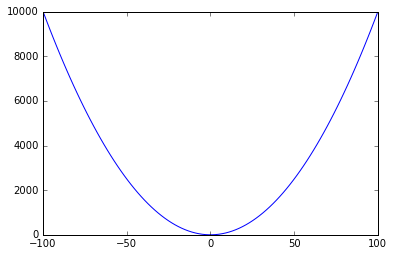

In [45]:
plot_power(2, 100, -100, 100)

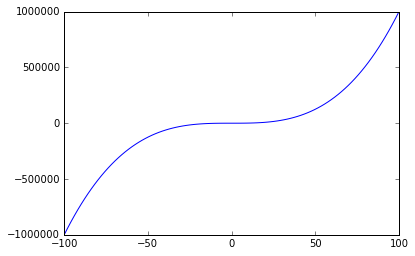

In [46]:
plot_power(3, 100, -100, 100)

----

## Question 11

**Make a 4x4 plot, with the panels showing x^1, x^2, x^3, and x^4**: Write a function to produce a 4x4 set of axes, with x^1, x^2, x^3, and x^4 plotted on them respectively, with m data points in the range (xmin,xmax). The function will take as input values xmin, xmax and m.

In [47]:
def subplots(num_points, xmin, xmax):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
    x = np.linspace(xmin, xmax, num_points)
    y1 = np.power(x, 1)
    y2 = np.power(x, 2)
    y3 = np.power(x, 3)
    y4 = np.power(x, 4)
    ax1.plot(x, y1)
    ax2.plot(x, y2)
    ax3.plot(x, y3)
    ax4.plot(x, y4)

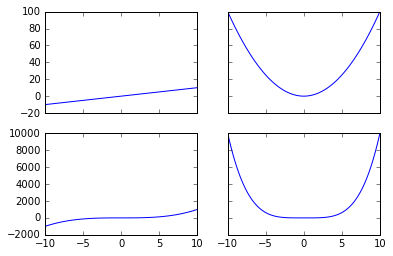

In [48]:
subplots(100, -10, 10)

----

## Question 12

**Scatter plot a cloud of random points**: Write a function which uses the module `matplotlib.pyplot` to plot and the random module to plot a scatterplot or random points. To learn how to use matplotlib to do this, Google it! You will probably want to use the function `random.randrange(start, stop[, step])` or `random.random()` to make the random numbers. Numpy also has a random module, which would be fine to use.

In [49]:
import numpy.random as rand

def scatter_randoms(low, high, number_samples):
    random_xs = rand.random_integers(low, high, number_samples)
    random_ys = rand.random_integers(low, high, number_samples)
    plt.scatter(random_xs, random_ys)

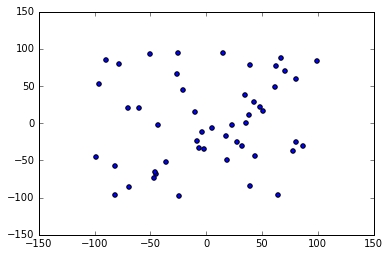

In [50]:
scatter_randoms(low=-100, high=100, number_samples=50)

----

## Question 13

**Produce a two-dimensional image (as opposed to scatter plot) of x^2 + y^2**: Write a code to produce a two-dimensional image of the surface x^2 + y^2 in the range (xmin,xmax). To do this you need to produce a two-dimensional array containing the result of f(x,y) = x^2 + y^2. You can make the image using the matplotlib.pyplot function imshow(). Note that when using matplotlib.pyplot.imshow() you should always add the arguments interpolation='nearest' and origin='lower'. For some reason imshow by default smooths your image, and setting interpolation='nearest' turns this off so the true pixels are shown. The second argument is to set the origin of the image to the lower left hand corner of the image. Strangely, this is not the default!

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import random

def fun(x, y):
  return x ** 2 + y ** 2

def surface(xmin, xmax, ymin, ymax, num_points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.linspace(xmin, xmax, num_points)
    y = x = np.linspace(ymin, ymax, num_points)
    X, Y = np.meshgrid(x, y)
    zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    ax.plot_surface(X, Y, Z)

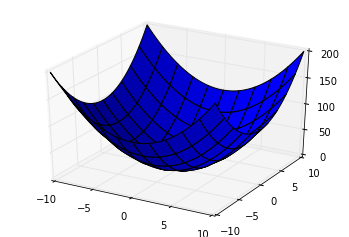

In [52]:
surface(-10, 10, -10, 10, 100)

----

## Question 14

**Import data from a .txt or .csv file and put the columns into lists or arrays**: Write a function to import data from a file (.csv or other basic text format). The data will have some delimiter between fields, e.g. ',' (comma) or '\t' (tab character) or ' ' (whitespace). Which delimiter the data has should be a function argument. You will also need to know how many columns the data has and the filename of the dataset. 
The input should look like (for example):

```
data = read_data('mydata.txt', ncols=4, delimiter=',')
```

The output (data) should look like (for example):
	
```
>>> data[0]
['policyID' '119736' '448094' ..., '791209' '322627'
'398149']
>>> data[1]
['statecode' 'FL' 'FL' ..., 'FL' 'FL' 'FL']
>>> data[2]
['county' 'CLAY COUNTY' 'CLAY COUNTY' ..., 'PINELLAS COUNTY'
 'PINELLAS COUNTY' 'PINELLAS COUNTY']
```

etc., where the above shows the first, second and third columns of some data respectively. 


In [53]:
import csv

def read_data(filename, ncols, delimiter):
    file = open(filename)
    reader = csv.reader(file, delimiter=delimiter)
    # List comprehension ensures each initial empty list is
    # different (no sharing)
    result = [[] for _count in range(ncols)]
    for row in reader:
        # slice of ncols, this will support situations where
        # the length of the row is shorter than ncols
        columns = row[:ncols]
        for index, item in enumerate(columns):
            result[index].append(item)
    file.close()
    return result

In [54]:
read_data('rainfall.csv', 3, ',')

[['Product code',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDCJAC0001',
  'IDC

----

## Question 15

**Write data to file**: Write a function to save a data array to file. The function should take the filename to save to as an argument, along with an optional argument to specify the delimiter. The data should be written into the file so that each column contains a separate field of the data, and the rows contain the different values of the fields. 

The input should look like (for example):

```
write_data(data, 'mydata.csv', delimiter=',')
```

There will be no output, but the resulting file should look like (for example):

```
id,weight,height,width,type,comment
12,7,3,5,mineral,copper
56,3,1,7,food,chips
```

etc…

In [55]:
def write_data(data, filename, delimiter):
    file = open(filename, 'w')
    writer = csv.writer(file, delimiter=delimiter)
    for row in data:
        writer.writerow(row)
    file.close()

In [56]:
test_data = read_data('rainfall.csv', 5, ',')
write_data(test_data, 'question15.out.csv', '\t')

----

## Question 16

**Join csv files**: Write a function to join two csv (or txt) files on a given column they have in common, and write the result to a new file, with the first column being the joining column. This function should take as its input a list of filenames corresponding to the datasets to join, a list containing the number of columns in each file, and list containing the column number of the common column in each file. It should also contain optional arguments for the filename to save the joined data to, a list of delimiters for the input files, and a header name, which will be the name of the column to be joined on. In the case of a header id existing, the code should make sure the column headers are the first entry in the new data file.

The input should look like (for example):

```
# (input data, number of cols, colnumber to join on, header id)
# (savename and delimiters left to default)
join_csvs(['data1.csv', 'data2.csv'], [4,3], [0,0], header='id')
```

Which for input files which look like:

```
id,type,comment
12,mineral,copper
6,food,pizza
56,food,chips
5,mineral,gold
12,animal,cat
```

and:

```
id,weight,height,width
12,4,7,2
6,8,3,2
56,3,23,7
5,6,32,4
12,7,3,5
```

should produce a new file which looks like:

```
id,weight,height,width,type,comment
12,7,3,5,animal,cat
56,3,23,7,food,chips
5,6,32,4,mineral,gold
6,8,3,2,food,pizza
```

**Note** The solution below diverges from the above question in a couple of ways.

1. The question does not make it clear what to do if multiple rows in an input file have the same header. We assume this should never happen and modify the input files to adhere to this assumption. Note in the quesiton above the the first file has two rows which have an "id" of 12.
2. Our solution below makes no assumptions about the number of columns in the input files, and is therefore somewhat more general than what was specified in the problem.
3. We output the values from the first file first in the output, then the values from the second file.

In [60]:
import csv

def other_fieldnames(header, fieldnames):
    return [f for f in fieldnames if f != header]

def other_values(header, values, fieldnames):
    return [values[key] for key in fieldnames if key != header]

# This solution assumes both input CSV files
# have a header.
#
# This solution also illustrates the use of the "with"
# context manager with file handling
def join_csvs(filename1, filename2, filename_out, header):
    with open(filename1) as file1:
        reader1 = csv.DictReader(file1)
        file1_fieldnames = reader1.fieldnames
        file1_map = {}
        for row in reader1:
            # assume the header is valid for this file
            key = row[header]
            # collect all the values which are not equal to the key
            values = other_values(header, row, file1_fieldnames)
            file1_map[key] = values
    with open(filename_out, "w") as file_out, \
         open(filename2) as file2:
        writer = csv.writer(file_out)
        reader2 = csv.DictReader(file2)
        file2_fieldnames = reader2.fieldnames
        out_header = [header] + other_fieldnames(header, file1_fieldnames) + \
                             other_fieldnames(header, file2_fieldnames)
        writer.writerow(out_header)
        for row in reader2:
            key = row[header]      
            if key in file1_map:
                file1_values = file1_map[key]
                file2_values = other_values(header, row, file2_fieldnames)
                out_row = [key] + file1_values + file2_values
                writer.writerow(out_row)
            
        
                

In [61]:
join_csvs("question16.in.1.csv", "question16.in.2.csv", "question16.out.csv", "id")

In [62]:
%cat question16.out.csv

----

## Queston 17

**A function to plot the histogram of a column of data from a datafile**: Write a function to plot the histogram of a column of data from a datafile. The data doesn't need to be numerical. The function should take as its input the filename of the input data, the filename to save the histogram to, the number of columns in the datafile, and the column to make the histogram of. The function should also have a boolean header as an optional argument. If this is True, the first line of the datafile will be skipped. 

The input should look like (for example):

```
hist_plot(filename, savename, ncol, histcol, header=True)
```

In [63]:
import csv

# Assume that the input data has a header
def hist_plot(filename, histcol):
    histogram = {}
    file = open(filename)
    reader = csv.DictReader(file)
    for row in reader:
        val = row[histcol]
        if val in histogram:
            histogram[val] += 1
        else:
            histogram[val] = 1
    file.close()
    counts = histogram.values()
    indices = np.arange(len(histogram))
    plt.bar(indices, sorted(counts))

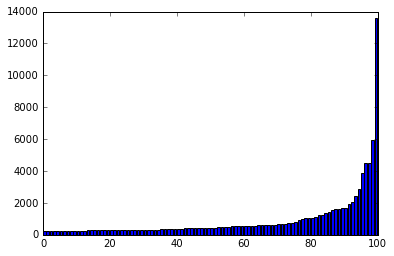

In [64]:
# histogram of the top 100 most frequent words in the novel "Moby Dick"
h = hist_plot('moby_dick_top_100.csv', 'word')

----

## Question 18

A function to count the number of instances of a string or number in a file: Write a function to count the number of instances of a string or number in a file, either from one column in the file, or from the whole file. The function should return the number of whole word/whole number instances, and the number of instances including within words/numbers. It should also return a list of locations, giving the column and row number of each occurrence of the the word/number for both types of searches.

For an input that looks like (for example):

```
>>> n_instances_whole, n_instances_all, loc_whole, loc_all = \
... count_instances_simple('FL_insurance_sample.csv', 'Coun', 18, header=True)
```

The output (data) should look like (for example):

```
>>> print n_instances_whole, n_instances_all
0 36632
```

And for an input that looks like (for example):

```
>>> n_instances_whole, n_instances_all, loc_whole, loc_all = \
... count_instances_simple('FL_insurance_sample.csv', 'County', 18, header=True)
```

The output (data) should look like (for example):

```
>>> print n_instances_whole, n_instances_all
36632 36632
```

You will need to use regular expressions to do this (or at least you should!). A good place to practice using a regular expression is http://www.regexr.com/. Use this site to make sure your regex does what you want before making it in your code. To denote a regular expression in Python, you preface a string with an r, however, you can't include a variable in this. So, in order to construct a search term containing a variable you need to add it to the regular expression:

```
# Start the regex:
my_re = r'\b'
# Add the variable to the regex:
my_re += '('+st+')'
# Finish the regex:
my_re += r'\b'
```

Python will not interpret the '\b' term correctly unless you specify it is a regular
expression by prefacing it with an r.

Left as an exercise for the reader

----

## Question 19

**A function to integrate a e-bx from 0 to infinity**: Write a function to perform the integral using scipy.integrate.quad() or mpmath.quad(). The function should take as its arguments the parameters a and b, and should return the result of the integral. 

In [1]:
from scipy import integrate
import numpy as np

# Note sure what the parameter a is supposed to be in the question
def integral(b):
    func = lambda x: np.exp(-b * x)
    return integrate.quad(func, 0, np.inf)

In [2]:
integral(2)

(0.5, 7.735031683797485e-11)

----

## Question 20

**A function to parse arguments from the command line**: Write a function to parse arguments from the command line. Try adding two arguments - one which has a default and one which is required. You should also try different datatypes, like a string and a float. To do this you will need to use the module argparse. 
If you make a script called 'my_script.py' which contains the function 'parse_arguments()', and the following lines:
    
```
arguments = parse_arguments()
print arguments.required_num_arg,
arguments.optional_str_arg
```

Then you would call it as either:

```
$ python my_script.py --required_num_arg 10.
```

which will give:
    
```
10.0 this_is_the_default_value
```

Or you would call it as

```
$ python my_script.py --required_num_arg 10. --optional_str_arg Hello
```

Which will give:
    
```
10.0 Hello
```


In [4]:
%cat question20.solution.py

from argparse import ArgumentParser

def main():
    """Example function for parsing command line arguments"""
    parser = ArgumentParser(description="Solution to question 20 from the practice problems")
    parser.add_argument(
        '--required_num_arg', type=float, required=True,
        help='A numerical argument in floating point format') 
    parser.add_argument(
        '--optional_str_arg', type=str, required=False,
        default='this_is_the_default_value',
        help='A numerical argument in floating point format') 
    args = parser.parse_args()
    print('{} {}'.format(args.required_num_arg, args.optional_str_arg))

if __name__ == '__main__':
    main()


In [8]:
!python question20.solution.py --required_num_arg 10.

10.0 this_is_the_default_value


In [9]:
!python question20.solution.py --required_num_arg 10. --optional_str_arg Hello

10.0 Hello
